In [1]:
import numpy as np
import updated_library as gbc
from scipy.sparse import linalg as SSLA

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

img_path_ = "../../AllWriteUps/Thesis/imgs/"

# Relating bumps with Bumps with flat component



In [2]:
bumps_family = "../newdat/bumps_by_r/"
bumps_with_flat = "../newdat/bumps_with_flat/"

cha_obs = lambda x, rad, cut: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)
#cha_obs = lambda x, rad, cut: cut if 2*rad/np.tan(x)>cut else (-cut if 2*rad/np.tan(x)<-cut else 2*rad/np.tan(x)>cut)
c_ = 5*(10**4)

In [3]:
#---first values---#
P_bumps = np.load(bumps_family + "p_mats.npy", allow_pickle=False)
radii = np.load(bumps_family + "keys.npy", allow_pickle=False)[:,0]
theta_partition = np.load(bumps_family + "theta_partition.npy", allow_pickle=False)

P_one = P_bumps[0]

L = 2
P_alpha = np.load(bumps_with_flat + "p_mats.npy", allow_pickle=False)[::-1][L:]
alphas = np.load(bumps_with_flat + "keys.npy", allow_pickle=False)[L:]

In [26]:
alpha_var =  []
for P in P_alpha:
    # compute the variance
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # write to inner array
    alpha_var.append(cvar_)
alpha_var = np.array(alpha_var)

In [39]:
f_vec = cha_obs(theta_partition, rad=1/2, cut=c_)

IMP_ = np.identity(P_one.shape[0]) - P_one
g_vec, inf_ = SSLA.bicgstab(IMP_, f_vec, tol=10**(-2))

bumps_var = gbc.var_from_P(
    P_=P_one,
    angle_bins_=theta_partition,
    observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2)
)

estimate = bumps_var + 2*gbc.inner_prod(f_vec, g_vec)*(1-alphas)/alphas

In [81]:
var_GMA, g_vec_GMA, aaa = gbc.galerkin_var(
    P_=P_one,
    theta_partition_=theta_partition,
    f_=f_vec,
    galerkinN_=50
)

estimate_GMA = var_GMA + 2*gbc.inner_prod(f_vec, g_vec_GMA)*(1-alphas)/alphas


var_GMB, g_vec_GMB, aaa = gbc.galerkin_var(
    P_=P_one,
    theta_partition_=theta_partition,
    f_=f_vec,
    galerkinN_=250
)

estimate_GMB = var_GMB + 2*gbc.inner_prod(f_vec, g_vec_GMB)*(1-alphas)/alphas

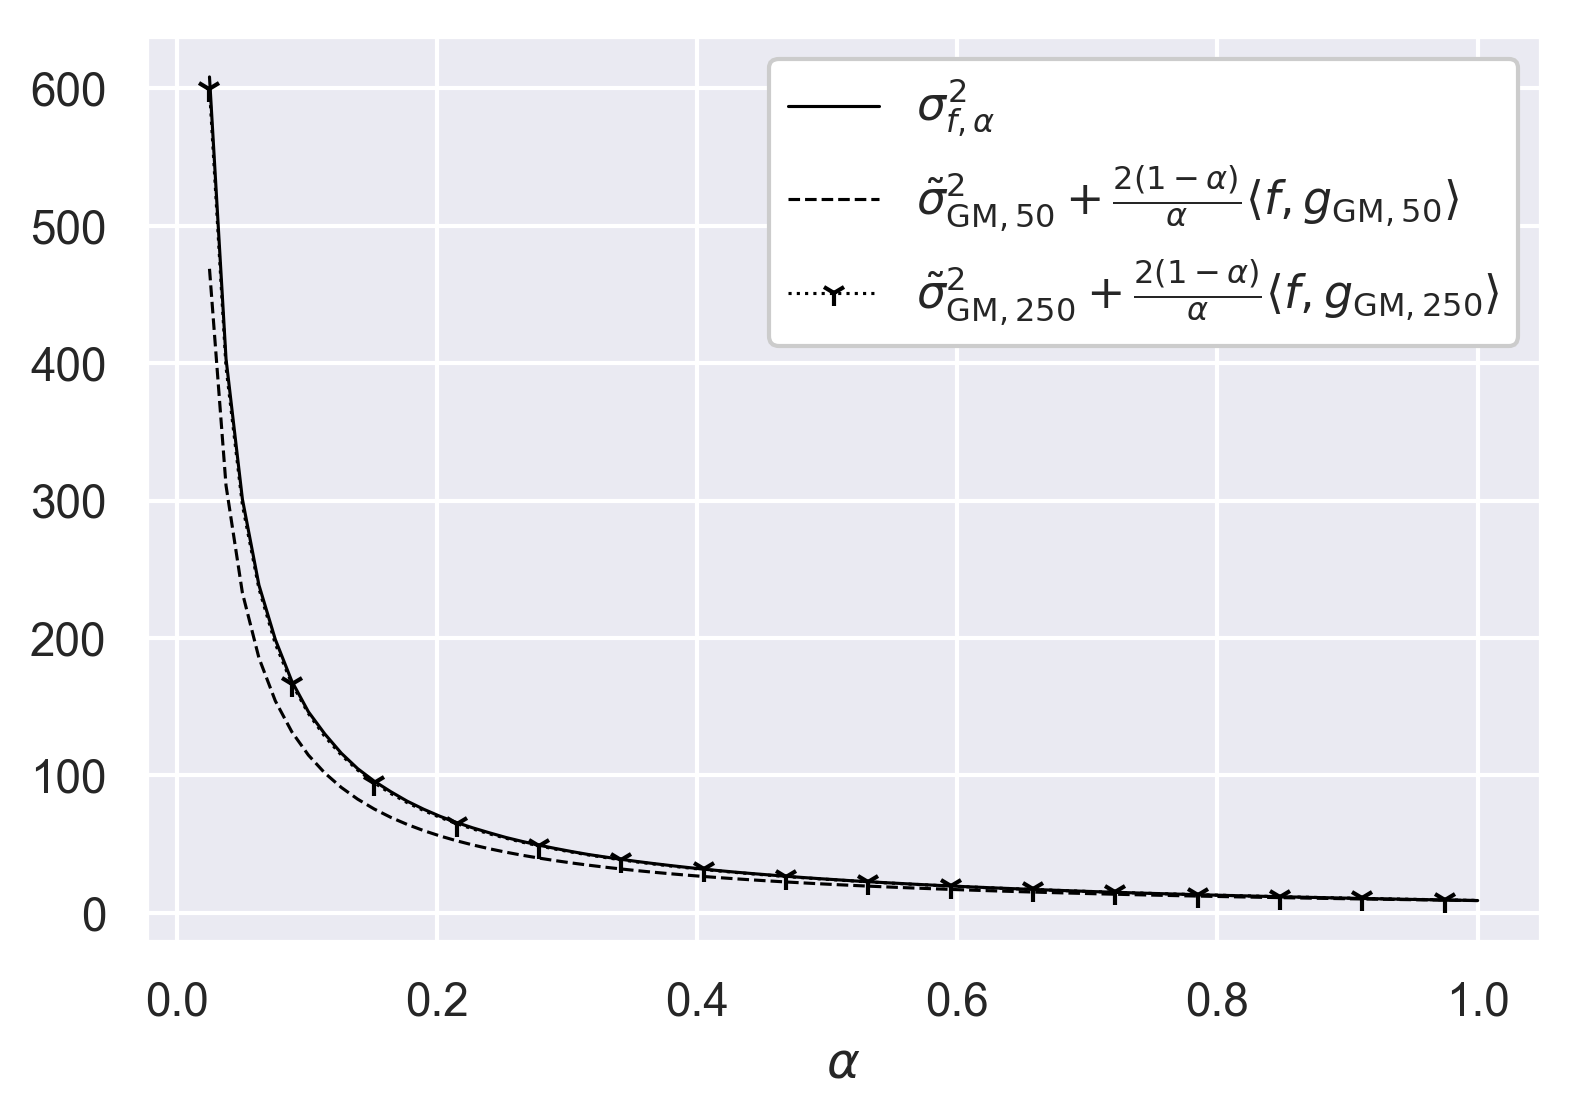

In [88]:
plt.plot(
    alphas,
    alpha_var,
    label=r"$\sigma^2_{f, \alpha}$",
    color="black",
    lw=0.75
)

# plt.plot(
#     alphas,
#     estimate,
#     label=r"$\sigma^2_{f,1}+\frac{2(1-\alpha)}{\alpha}\langle f, g \rangle$",
#     ls="--",
#     color="black",
#     lw=0.75,
#     marker="1",
#     markevery=5
# )

plt.plot(
    alphas,
    estimate_GMA,
    label=r"$\tilde{\sigma}^2_{\mathrm{GM}, 50}+\frac{2(1-\alpha)}{\alpha}\langle f, g_{\mathrm{GM}, 50} \rangle$",
    ls="--",
    color="black",
    lw=0.75
)

plt.plot(
    alphas,
    estimate_GMB, 
    label=r"$\tilde{\sigma}^2_{\mathrm{GM}, 250}+\frac{2(1-\alpha)}{\alpha}\langle f, g_{\mathrm{GM}, 250} \rangle$",
    ls=":",
    color="black",
    lw=0.75,
    marker="1",
    markevery=5
)

plt.xlabel(r"$\alpha$")
plt.legend(facecolor="white", framealpha=1)

plt.savefig(filename=img_path_+"var_bumps_with_bumpsflat.eps")
plt.show()

# Sample Micro-Structure

In [2]:
example = [
    gbc.make_line([-0.75, 1], [-1, 1]),
    gbc.make_line([-1,1], [-1,0.2]),
    gbc.make_line([-0.8,0], [1,0]),
    gbc.make_arc(0.2, [-1,0], [0, np.pi/2]),
    gbc.make_line([1,0], [1,1]),
    gbc.make_arc(0.1, [-0.5, 0.8], [np.pi/2, 3*np.pi/2]), 
    gbc.make_arc(0.1, [-0.5, 0.6], [3*np.pi/2, np.pi/2]), 
    gbc.make_arc(0.1, [-0.5, 0.4], [np.pi/2, 3*np.pi/2]),
    gbc.make_arc(0.1, [-0.5, 0.2], [3*np.pi/2, np.pi/2]),
    gbc.make_arc(0.25, [0, 0.5], [0, 2*np.pi]),
    gbc.make_line([0.5, 0.1], [0.75, 0.1]), 
    gbc.make_line([0.5, 0.1], [0.625, 0.35]),
    gbc.make_line([0.75, 0.1], [0.625, 0.35]),
    gbc.make_line([0.625, 0.35], [0.625, 0.8]),
    gbc.make_arc(0.125, [0.5, 0.8], [0, np.pi]),
    gbc.make_arc(0.1, [0.375, 0.7], [0, 2*np.pi]),
    gbc.make_exit_line([-0.75, 1], [1,1])
]

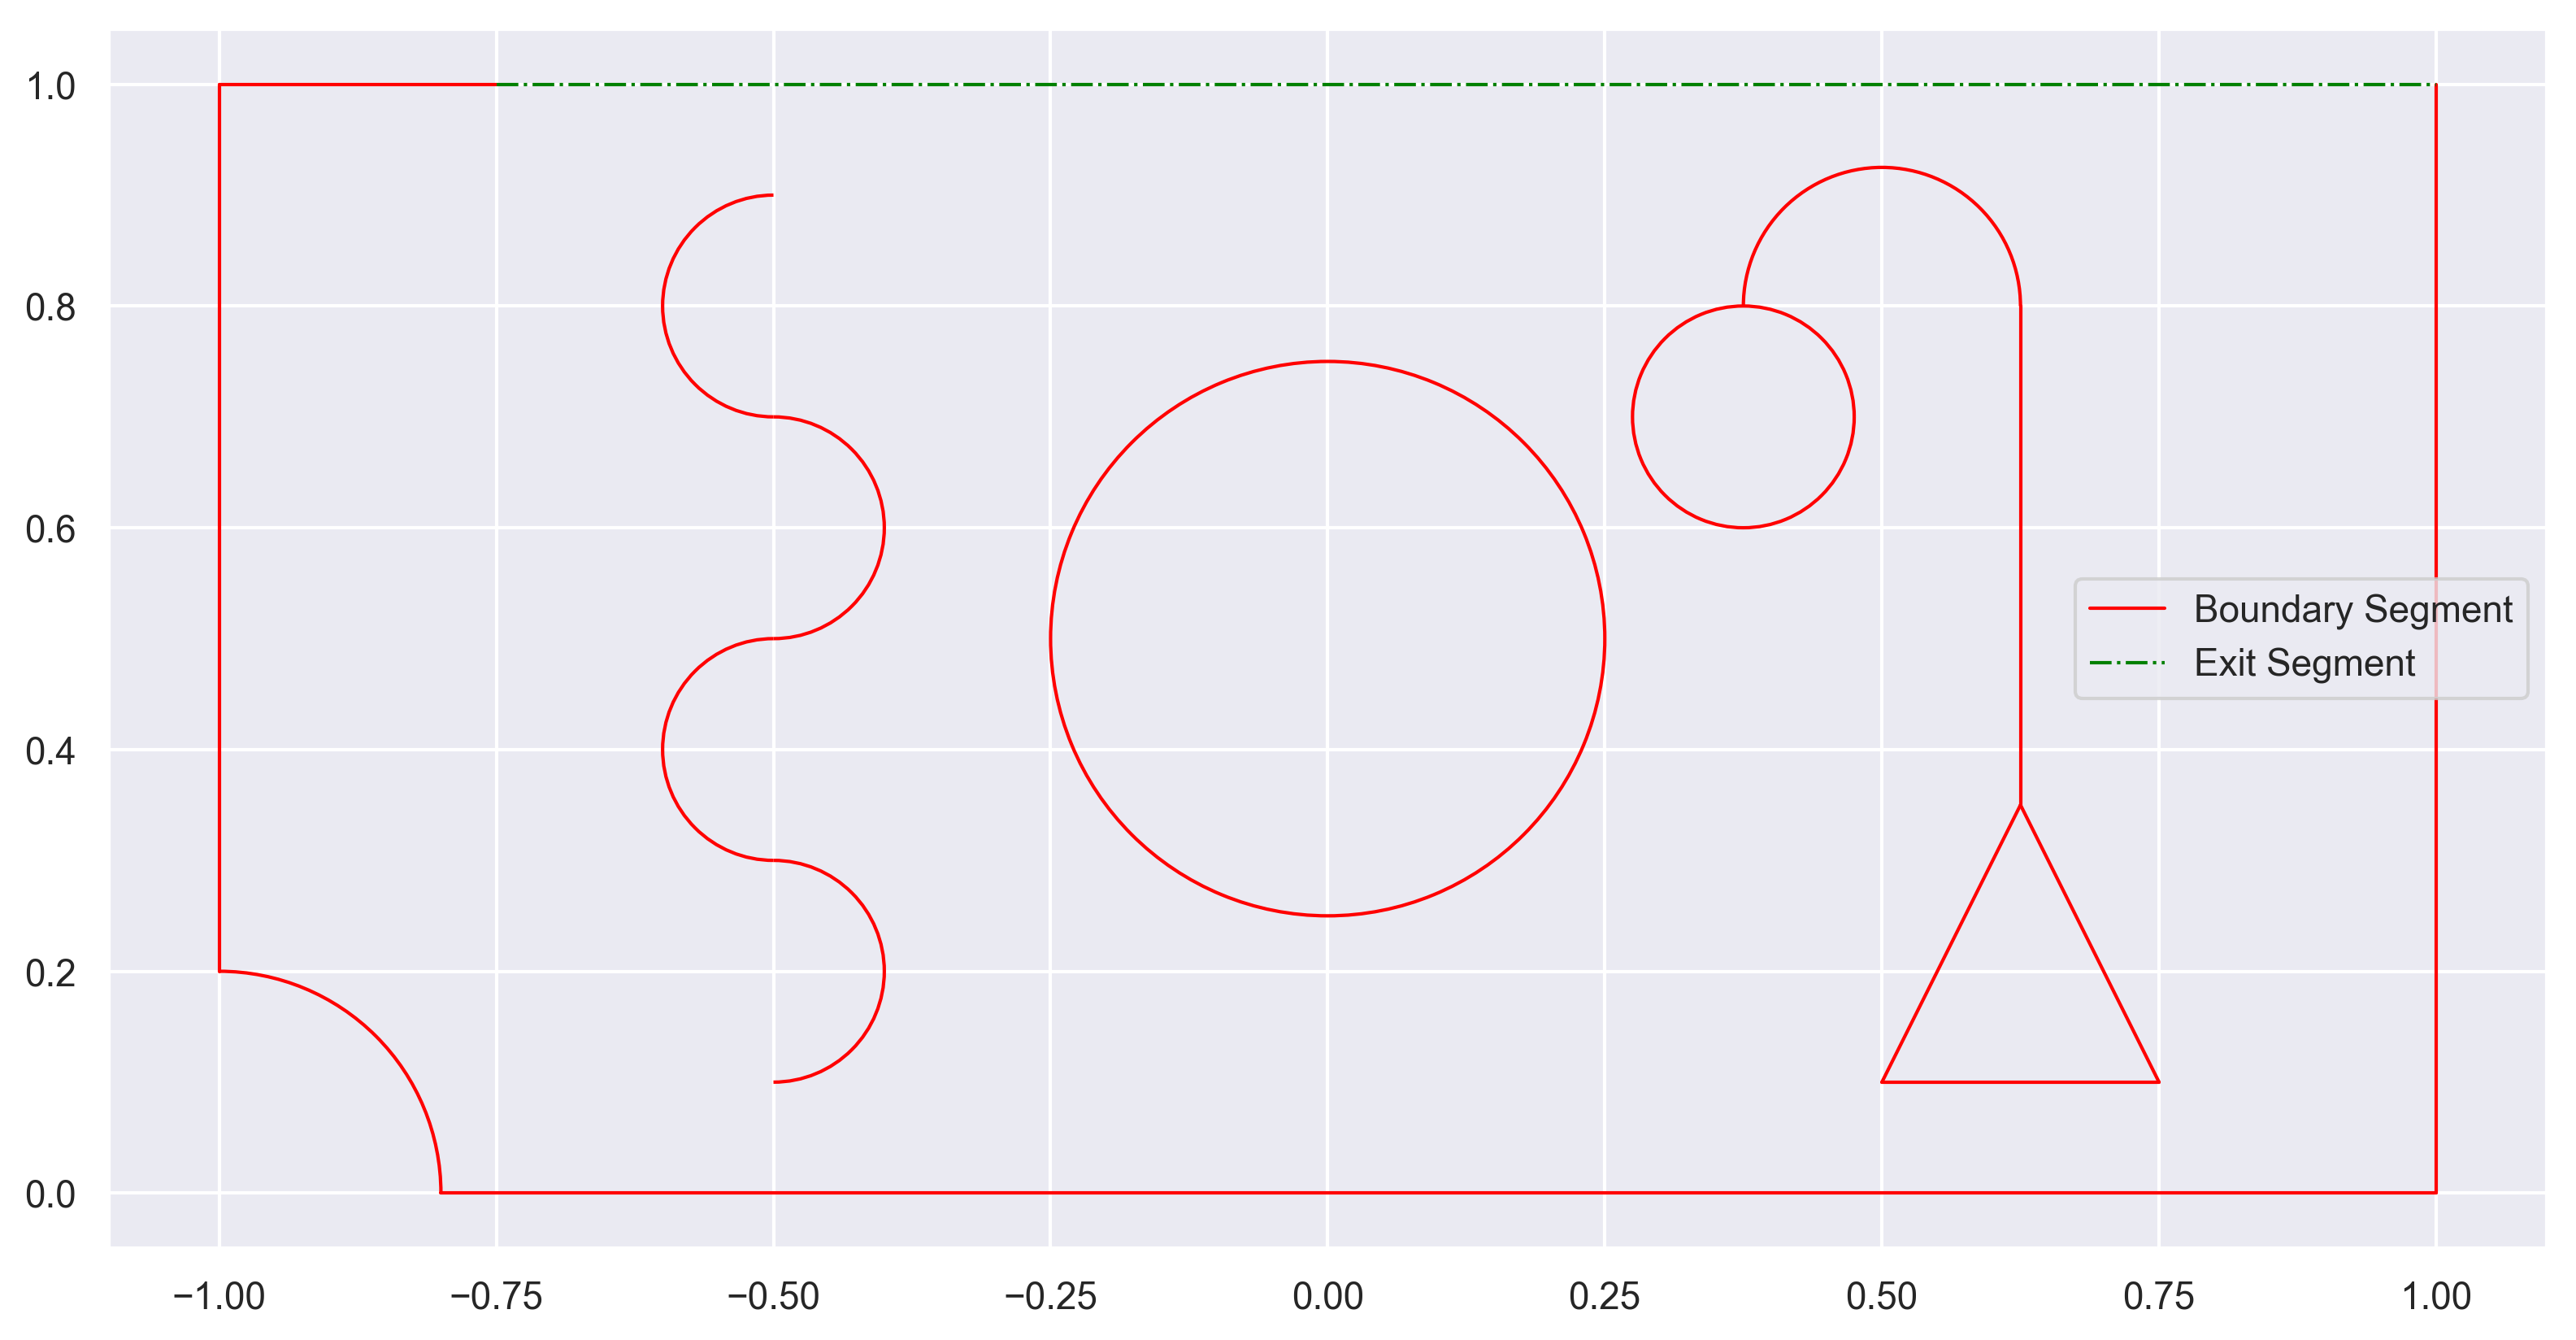

In [3]:
gbc.plot_segments(example)

# Surface Plots

In [5]:
P_stacks = np.load(bumps_family + "p_mats.npy", allow_pickle=False)

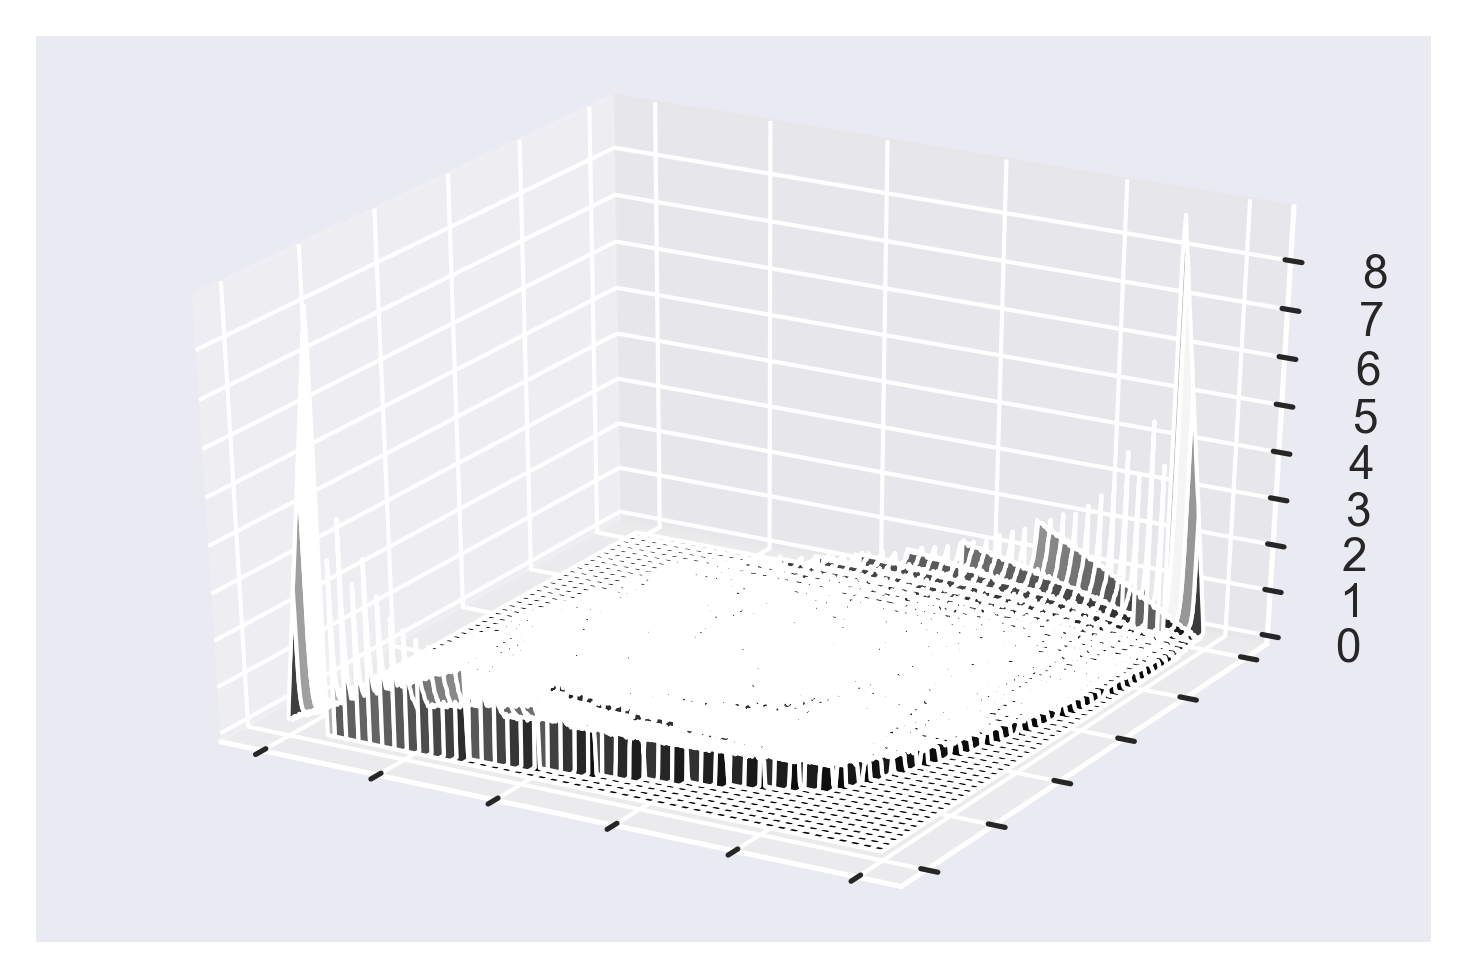

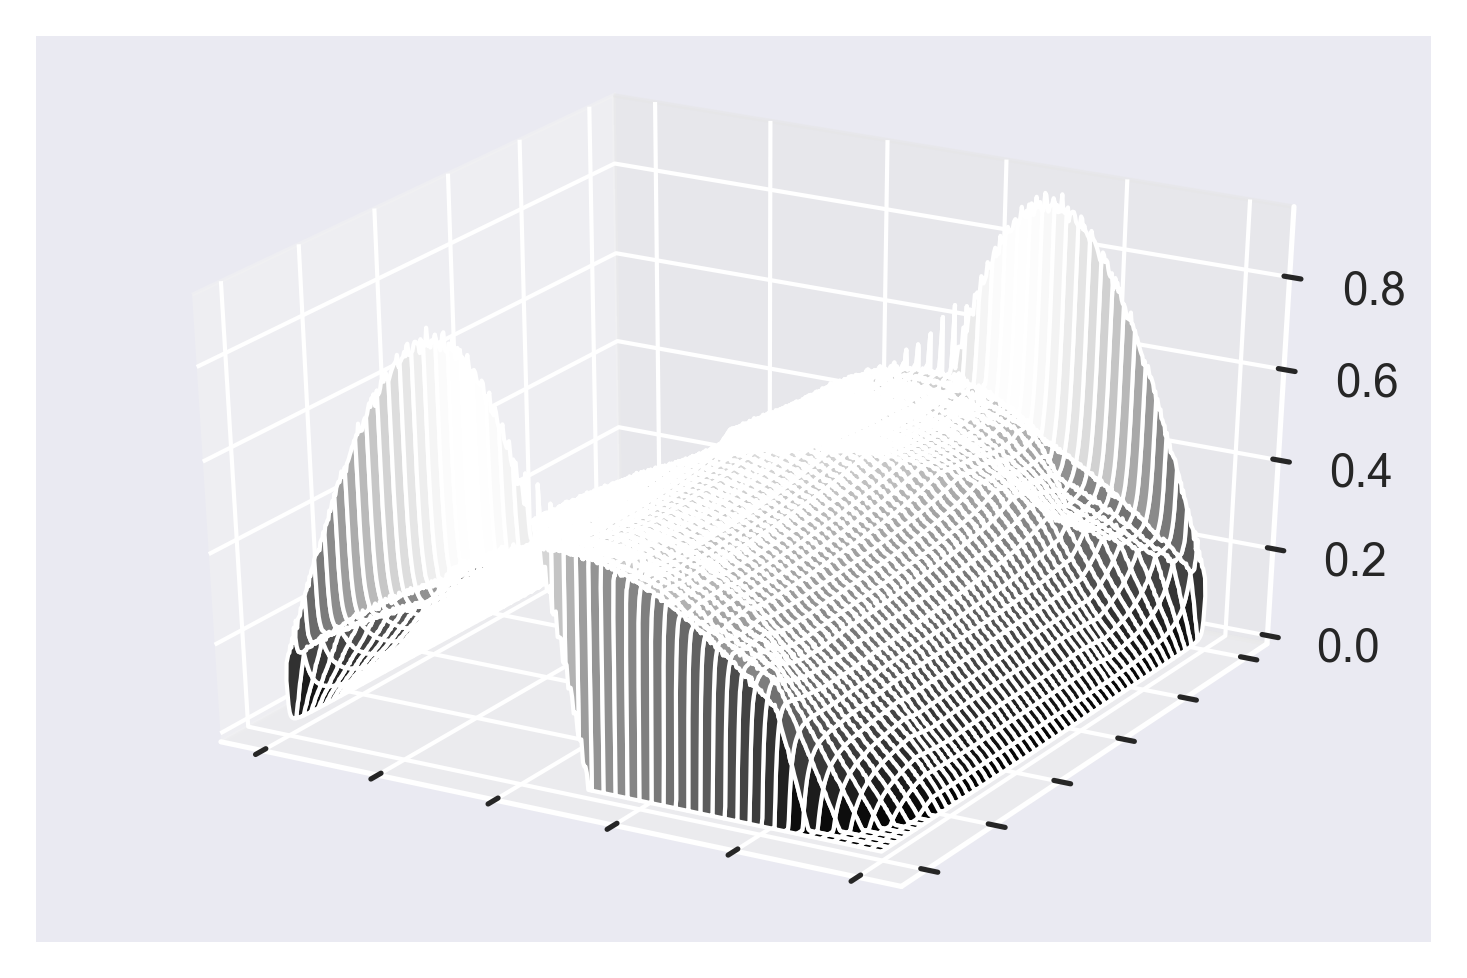

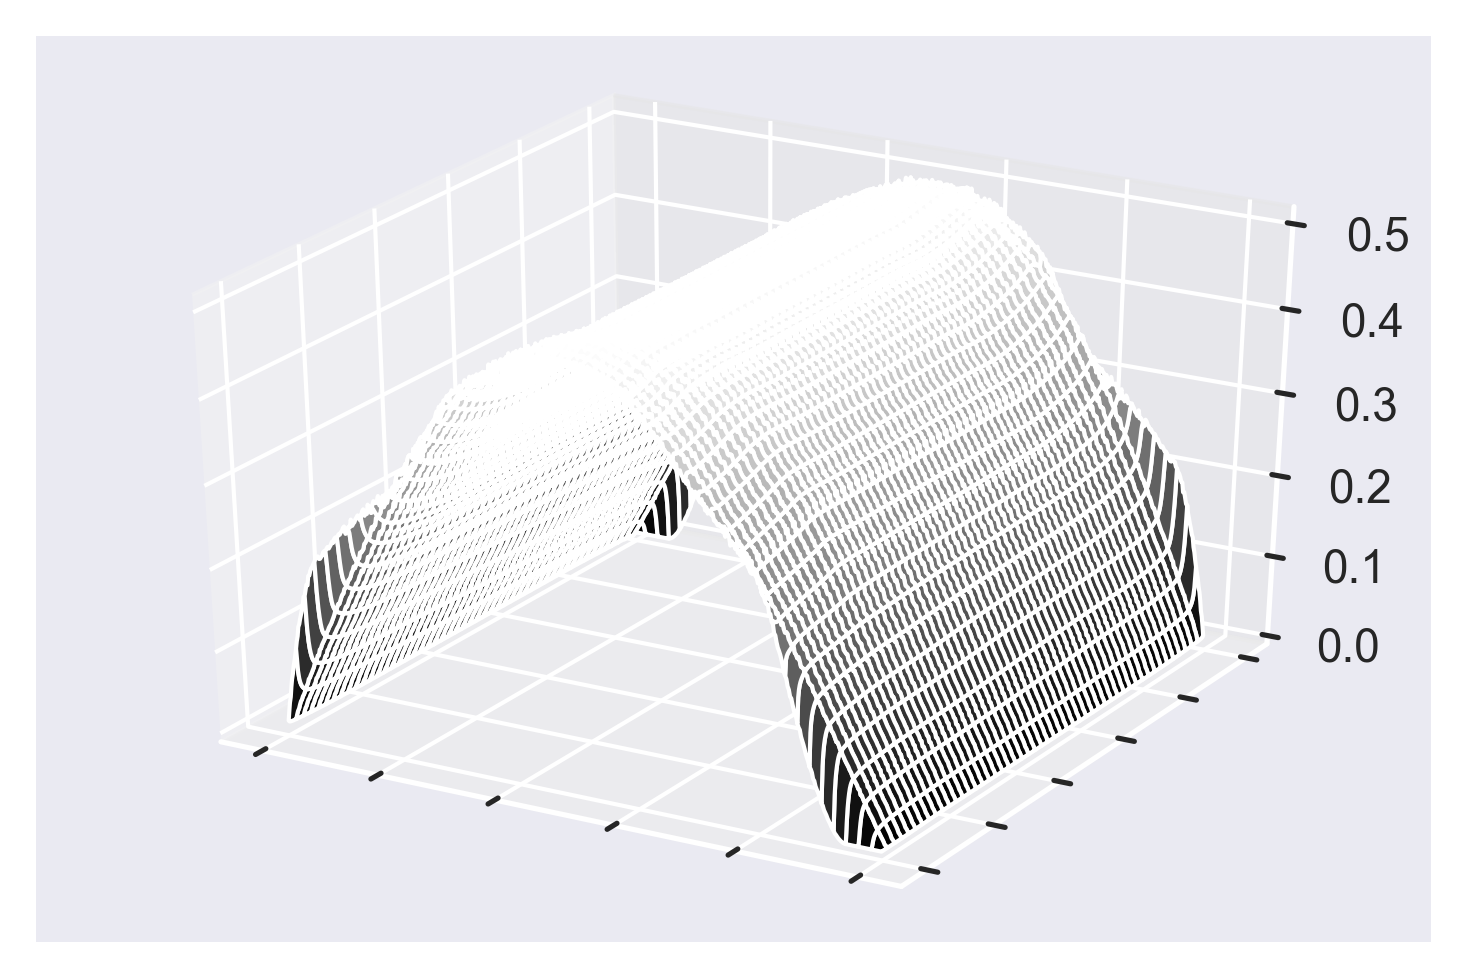

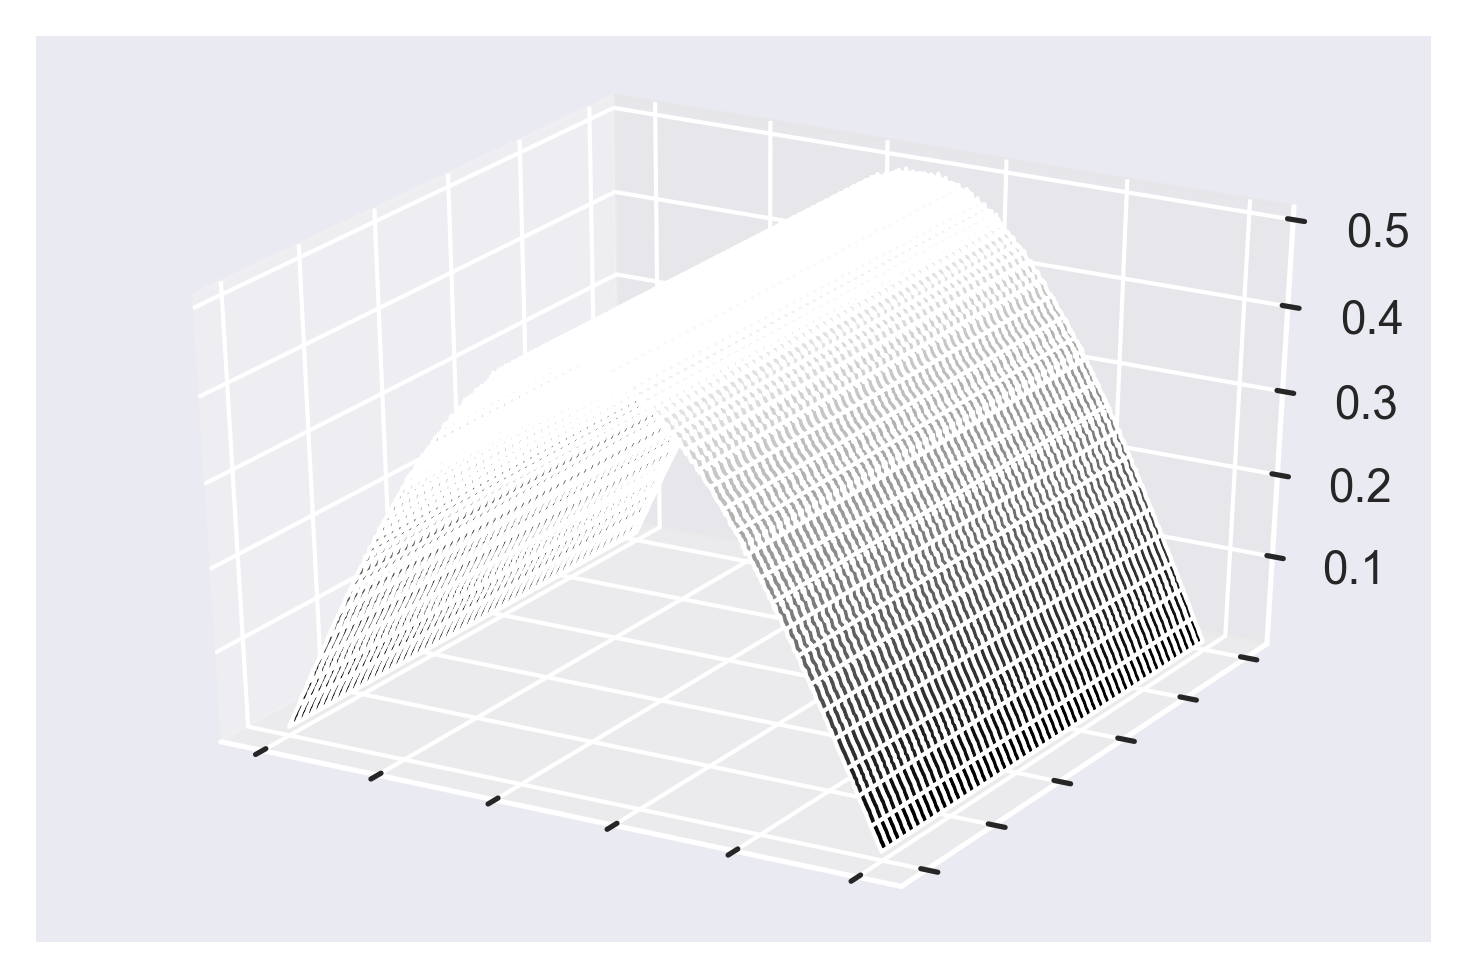

In [6]:
idx_ = 5
for k_ in [1, 2, 3, 4]:
    PP = np.linalg.matrix_power(P_stacks[idx_], k_)
    (fig, ax, surf) = gbc.surface_plot(PP/(np.pi/500), cmap=plt.cm.gray)

    #fig.colorbar(surf)

    # ax.set_xlabel('X (cols)')
    # ax.set_ylabel('Y (rows)')
    # ax.set_zlabel('Z (values)')
    ax.set_zticks(PP[50]/(np.pi/500), minor=True)
    plt.xticks(np.arange(0, 600, 100), " ")
    plt.yticks(np.arange(0, 600, 100), " ")
    plt.savefig(filename=img_path_+f"P_mat_powers_{k_}.eps")
    plt.savefig(filename=img_path_+f"P_mat_powers_{k_}.png")
    plt.show()

In [8]:
zero_pi = np.linspace(start=0, stop=np.pi, num=500)

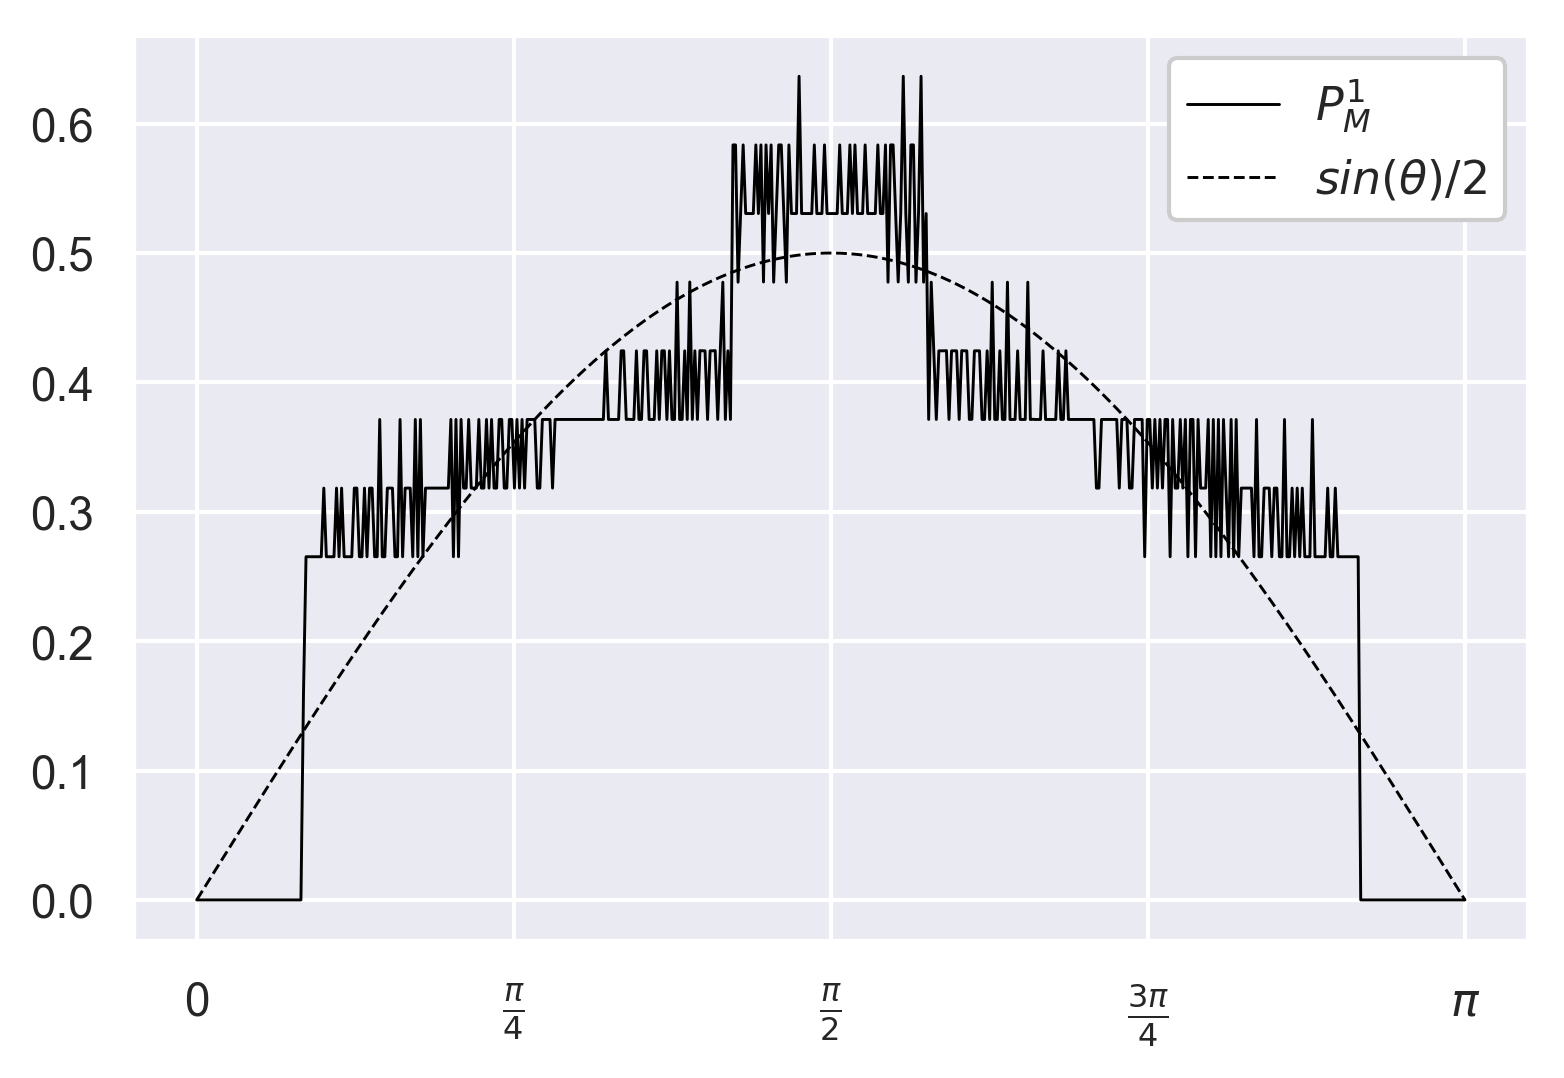

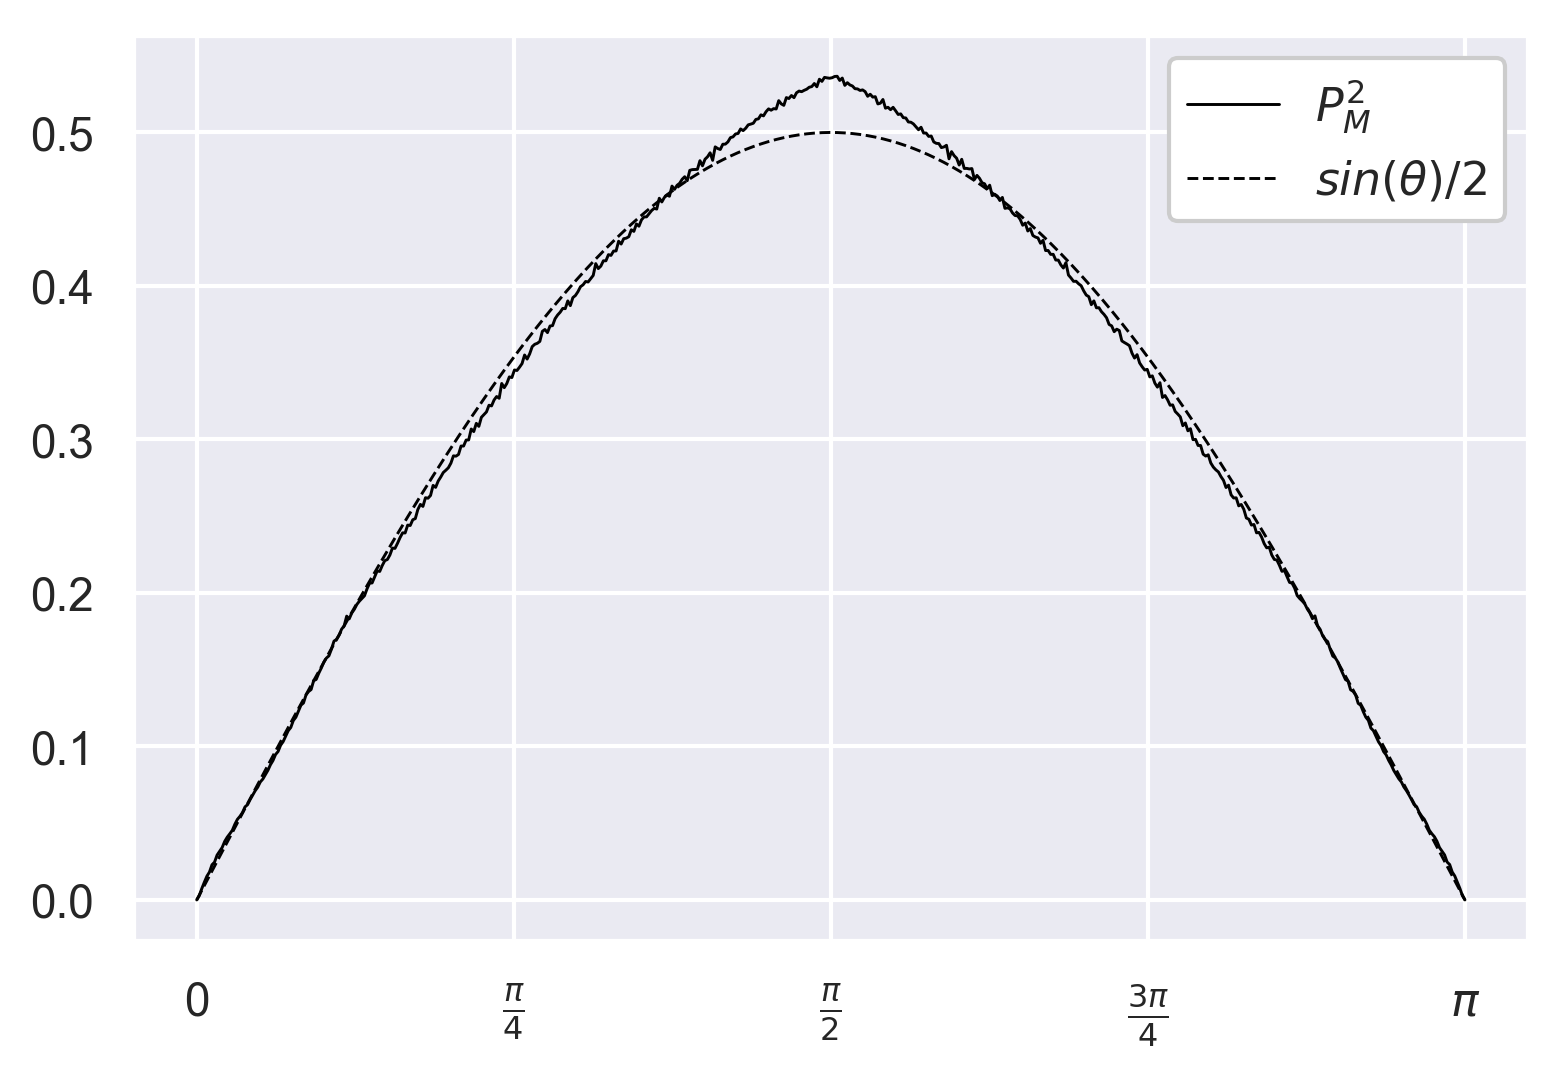

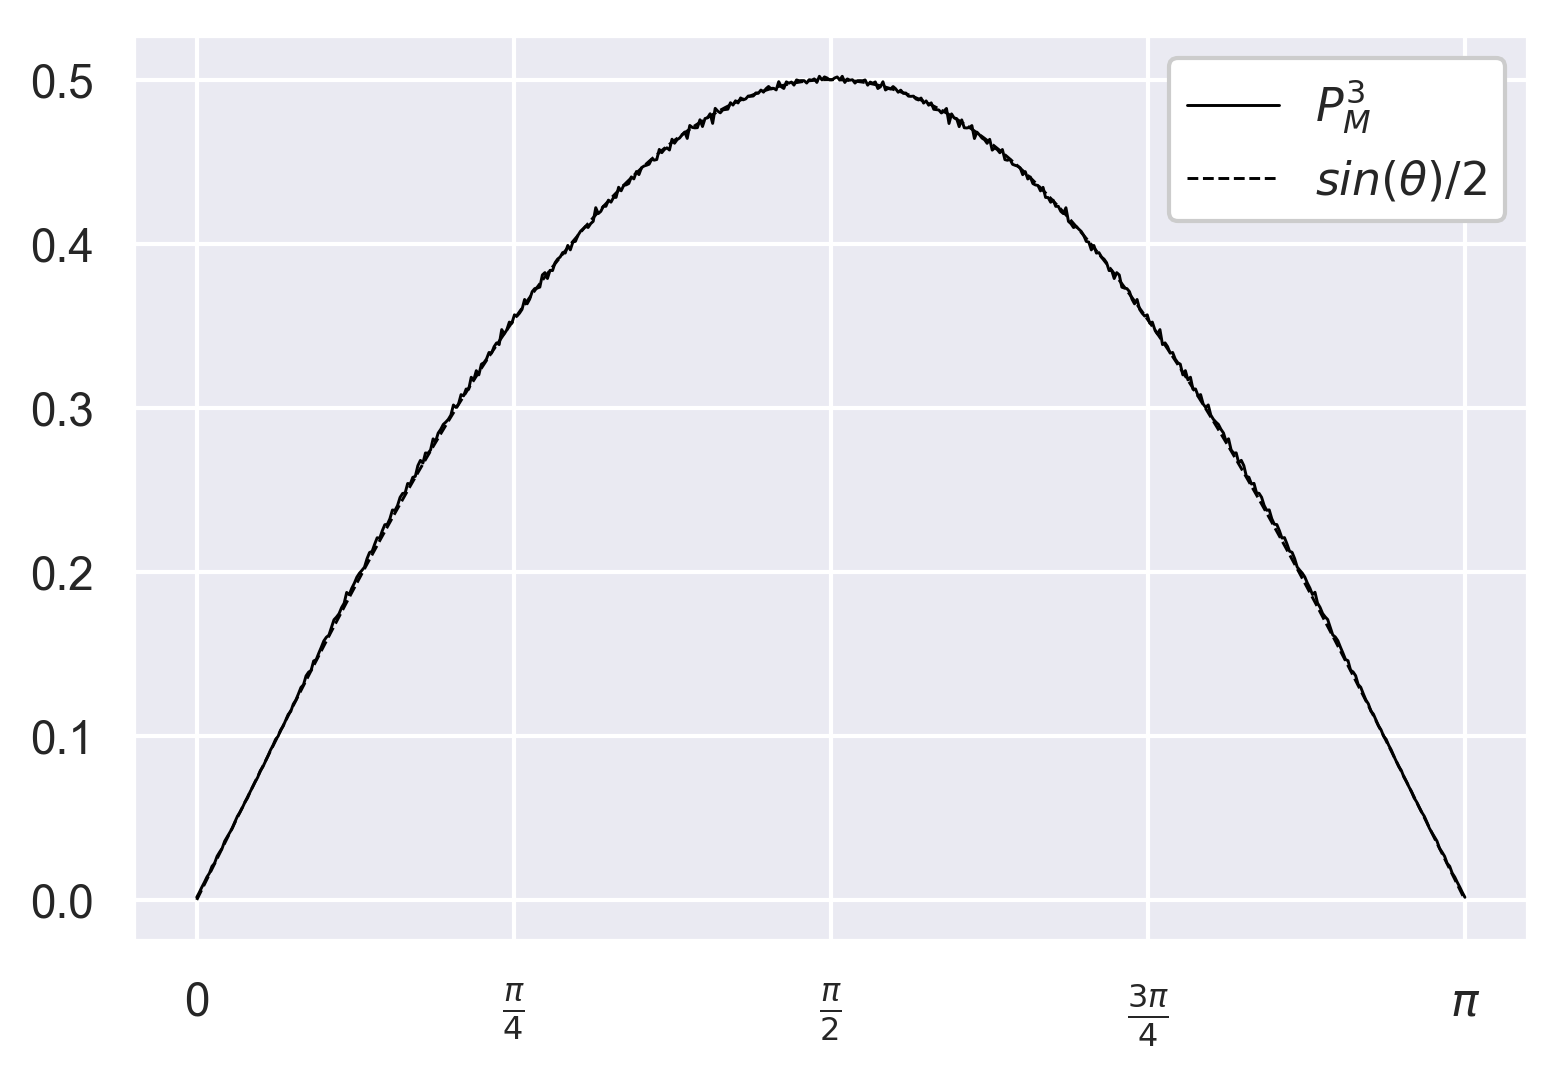

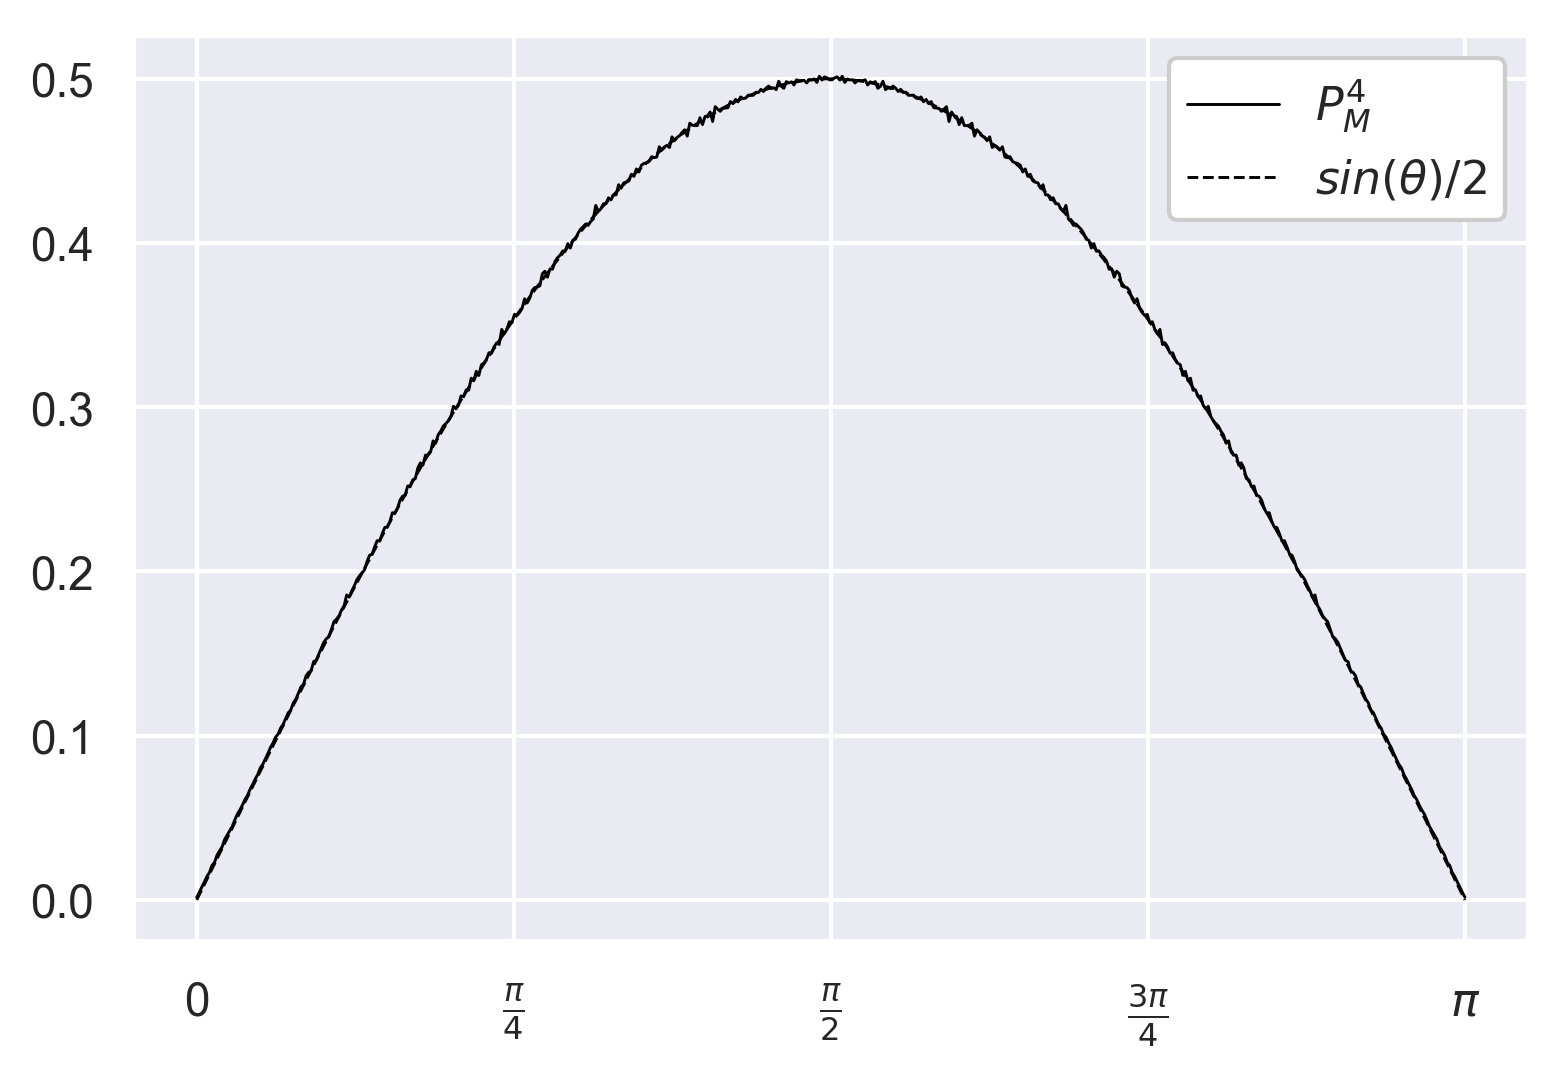

In [18]:
idx_ = 20
powers = [1, 2, 3, 4]
LS = ["-.", ":", "-"]
for i_, k_ in enumerate([1, 2, 3, 4]):
    PP = np.linalg.matrix_power(P_stacks[idx_], k_)
    
    plt.plot(zero_pi, PP[250]/(np.pi/500),
             label=r"$P_{{M}}^{}$".format(powers[i_]),
             lw=0.7,
             color="black"
            )
    plt.plot(zero_pi, np.sin(zero_pi)/2, color="black", lw=0.7, ls="--", label=r"$sin(\theta)/2$")
    
    plt.xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], ["0",r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"])
    plt.legend(facecolor="white", framealpha=1)
    plt.savefig(filename=img_path_+f"Ppowers_{powers[i_]}.eps")
    plt.show()